사용하는 dataset =  https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention
학생의 중퇴 및 학업 성공 능력을 예측

dataset 안에 있는 파라미터 설명

범주형 데이터 = Marital status , Application mode , Course , Daytime/evening attendance , Previous qualification , Nacionality, Mother's qualification , Father's qualification , Mother's occupation, Father's occupation , Displaced , Educational special needs , Debtor, Tuition fees up to date , Gender , Scholarship holder , International

숫자형 데이터 = 그 외 모두 

범주형 데이터를 쓰는 부분이 이미 라벨링이 되어있어서 기존의 값이 어떤 뜻을 가지고 있는지 알기가 어려움. 검색을 통해 본 데이터를 제공한 논문을 찾을 수 있었음 - https://www.mdpi.com/2306-5729/7/11/146

많은 피쳐가 추가되면 모델의 학습이 어려워지거나 과적합이 되는 문제가 생길 수 있기에 일부 칼럼들에 대해서만 one - hot 인코딩을 진행하고 나머지 칼럼에 대해서는 라벨 인코딩을 진행할 예정

Marital status = 총 6가지의 카테고리, 카테고리 수가 적기에 원핫 인코딩 진행
Gender, Displaced, Educational special needs, Debtor, Tuition fees up to date , Scholarship holder, International = 이진 값을 가지는 칼럼으로 원 핫 인코딩에 적합함

In [13]:
import pandas as pd
data = pd.read_csv('data/dataset.csv')
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mothers qualification,Fathers qualification,Mothers occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,6.886980,5.298964,1.00,1.00,8.000000,12.000000,18.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,9.899186,4.331792,1.00,6.00,10.000000,13.000000,17.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,2.531420,3.963707,1.00,1.00,1.000000,1.000000,17.000000
Nacionality,4424.0,1.254521,1.748447,1.00,1.00,1.000000,1.000000,21.000000
Mothers qualification,4424.0,12.322107,9.026251,1.00,2.00,13.000000,22.000000,29.000000
Fathers qualification,4424.0,16.455244,11.044800,1.00,3.00,14.000000,27.000000,34.000000
Mothers occupation,4424.0,7.317812,3.997828,1.00,5.00,6.000000,10.000000,32.000000


In [14]:
columns_to_drop = ['Marital status','International','Daytime/evening attendance',
                   'Nacionality', 'Educational special needs','Curricular units 1st sem (without evaluations)',
                   'Curricular units 2nd sem (without evaluations)','Curricular units 1st sem (credited)',
                   'Curricular units 1st sem (credited)', 'Previous qualification']
data = data.drop(columns=columns_to_drop)
data.head()

,Application mode,Application order,Course,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Displaced,Debtor,Tuition fees up to date,...,Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,8,5,2,13,10,6,10,1,0,1,...,0.000000,0,0,0,0,0.000000,10.8,1.4,1.74,Dropout
1,6,1,11,1,3,4,4,1,0,0,...,14.000000,0,6,6,6,13.666667,13.9,-0.3,0.79,Graduate
2,1,5,5,22,27,10,10,1,0,0,...,0.000000,0,6,0,0,0.000000,10.8,1.4,1.74,Dropout
3,8,2,15,23,27,6,4,1,0,1,...,13.428571,0,6,10,5,12.400000,9.4,-0.8,-3.12,Graduate
4,12,1,3,22,28,10,10,0,0,1,...,12.333333,0,6,6,6,13.000000,13.9,-0.3,0.79,Graduate


In [15]:
data['Target'] = data['Target'].map({'Dropout':0, 'Enrolled':2, 'Graduate':1 })
data

,Application mode,Application order,Course,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Displaced,Debtor,Tuition fees up to date,...,Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,8,5,2,13,10,6,10,1,0,1,...,0.000000,0,0,0,0,0.000000,10.8,1.4,1.74,0
1,6,1,11,1,3,4,4,1,0,0,...,14.000000,0,6,6,6,13.666667,13.9,-0.3,0.79,1
2,1,5,5,22,27,10,10,1,0,0,...,0.000000,0,6,0,0,0.000000,10.8,1.4,1.74,0
3,8,2,15,23,27,6,4,1,0,1,...,13.428571,0,6,10,5,12.400000,9.4,-0.8,-3.12,1
4,12,1,3,22,28,10,10,0,0,1,...,12.333333,0,6,6,6,13.000000,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,15,1,1,6,5,0,0,1,...,13.600000,0,6,8,5,12.666667,15.5,2.8,-4.06,1
4420,1,2,15,1,1,10,10,1,1,0,...,12.000000,0,6,6,2,11.000000,11.1,0.6,2.02,0
4421,1,1,12,22,27,10,10,1,0,1,...,14.912500,0,8,9,1,13.500000,13.9,-0.3,0.79,0
4422,1,1,9,22,27,8,5,1,0,1,...,13.800000,0,5,6,5,12.000000,9.4,-0.8,-3.12,1


In [16]:
# 우리가 보고 싶은 것은 이 학생이 졸업을 할지 중퇴를 할지를 예측하는 것이다. Enrolled는 필요없기에 삭제
data = data[data.Target != 2]
data

,Application mode,Application order,Course,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Displaced,Debtor,Tuition fees up to date,...,Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,8,5,2,13,10,6,10,1,0,1,...,0.000000,0,0,0,0,0.000000,10.8,1.4,1.74,0
1,6,1,11,1,3,4,4,1,0,0,...,14.000000,0,6,6,6,13.666667,13.9,-0.3,0.79,1
2,1,5,5,22,27,10,10,1,0,0,...,0.000000,0,6,0,0,0.000000,10.8,1.4,1.74,0
3,8,2,15,23,27,6,4,1,0,1,...,13.428571,0,6,10,5,12.400000,9.4,-0.8,-3.12,1
4,12,1,3,22,28,10,10,0,0,1,...,12.333333,0,6,6,6,13.000000,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,15,1,1,6,5,0,0,1,...,13.600000,0,6,8,5,12.666667,15.5,2.8,-4.06,1
4420,1,2,15,1,1,10,10,1,1,0,...,12.000000,0,6,6,2,11.000000,11.1,0.6,2.02,0
4421,1,1,12,22,27,10,10,1,0,1,...,14.912500,0,8,9,1,13.500000,13.9,-0.3,0.79,0
4422,1,1,9,22,27,8,5,1,0,1,...,13.800000,0,5,6,5,12.000000,9.4,-0.8,-3.12,1


In [17]:
# 기존 데이터 손상 방지를 위해 encoded 라는 새로운 dataframe 설정

encoded = pd.get_dummies(data, columns=['Gender', 'Displaced', 'Debtor', 'Tuition fees up to date', 'Scholarship holder'
                                       ,'Application mode','Course'])
encoded.head()

,Application order,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),...,Course_8,Course_9,Course_10,Course_11,Course_12,Course_13,Course_14,Course_15,Course_16,Course_17
0,5,13,10,6,10,20,0,0,0,0.000000,...,False,False,False,False,False,False,False,False,False,False
1,1,1,3,4,4,19,6,6,6,14.000000,...,False,False,False,True,False,False,False,False,False,False
2,5,22,27,10,10,19,6,0,0,0.000000,...,False,False,False,False,False,False,False,False,False,False
3,2,23,27,6,4,20,6,8,6,13.428571,...,False,False,False,False,False,False,False,True,False,False
4,1,22,28,10,10,45,6,9,5,12.333333,...,False,False,False,False,False,False,False,False,False,False


In [18]:
encoded.replace({True: 1, False: 0}, inplace=True)
encoded.head()

,Application order,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),...,Course_8,Course_9,Course_10,Course_11,Course_12,Course_13,Course_14,Course_15,Course_16,Course_17
0,5,13,10,6,10,20,0,0,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,1,3,4,4,19,6,6,6,14.000000,...,0,0,0,1,0,0,0,0,0,0
2,5,22,27,10,10,19,6,0,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,2,23,27,6,4,20,6,8,6,13.428571,...,0,0,0,0,0,0,0,1,0,0
4,1,22,28,10,10,45,6,9,5,12.333333,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# 숫자형 데이터 정규화 MinMaxScaler를 사용해서 0~1로 통일

from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Application order', 'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP', 
                        'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 
                        'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
                        'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 
                        'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']

scaler = MinMaxScaler()

# 열들의 값을 0~1로 정규화
encoded[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

encoded.head()

,Marital status,Application order,Daytime/evening attendance,Previous qualification,Nacionality,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Educational special needs,...,Course_8,Course_9,Course_10,Course_11,Course_12,Course_13,Course_14,Course_15,Course_16,Course_17
0,1,0.833333,1,1,1,13,10,6,10,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.166667,1,1,1,1,3,4,4,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0.833333,1,1,1,22,27,10,10,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.333333,1,1,1,23,27,6,4,0,...,0,0,0,0,0,0,0,1,0,0
4,2,0.166667,0,1,1,22,28,10,10,0,...,0,0,0,0,0,0,0,0,0,0


DecisionTree Training Accuracy: 98.66%
DecisionTree Test Accuracy: 86.23%
Mean CV Accuracy: 86.72%
Standard Deviation of CV Accuracy: 1.12%
Confusion Matrix:
[[350  76]
 [ 74 589]]


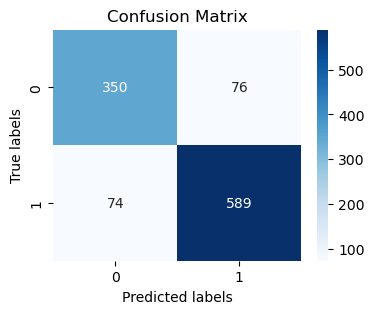

In [36]:
# Decision Tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

X = encoded.drop('Target', axis=1)  
y = encoded['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state = 42)

dt_clf = DecisionTreeClassifier(max_depth = 15)

dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test,dt_pred)

dt_train_pred = dt_clf.predict(X_train)
dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
print(f"DecisionTree Training Accuracy: {dt_train_accuracy*100:.2f}%")
print(f"DecisionTree Test Accuracy: {dt_accuracy*100:.2f}%")

# 교차 검증
cv_scores = cross_val_score(dt_clf, X, y, cv=5, scoring='accuracy')
#print(f"Cross Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()*100:.2f}%") 
print(f"Standard Deviation of CV Accuracy: {cv_scores.std()*100:.2f}%") 

# 예측
y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

# 오차 행렬
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 오차 행렬 시각화
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best Hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 2}
Mean CV Accuracy: 0.8839
DecisionTree with Best Hyperparameters Test Accuracy: 87.51%
Confusion Matrix for Best Hyperparameters:
[[337  89]
 [ 47 616]]


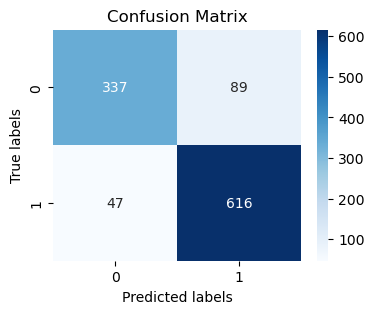

In [48]:
# Decision Tree 하이퍼 파라미터

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Mean CV Accuracy: {grid_search.best_score_:.4f}")

# 최적의 하이퍼파라미터로 훈련된 모델을 사용
best_dt_clf = grid_search.best_estimator_

best_dt_pred = best_dt_clf.predict(X_test)
best_dt_accuracy = accuracy_score(y_test, best_dt_pred)

print(f"DecisionTree with Best Hyperparameters Test Accuracy: {best_dt_accuracy*100:.2f}%")

# 오차 행렬 출력
best_conf_matrix = confusion_matrix(y_test, best_dt_pred)
print("Confusion Matrix for Best Hyperparameters:")
print(best_conf_matrix)

# 오차 행렬 시각화
plt.figure(figsize=(4, 3))
sns.heatmap(best_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Random Forest Accuracy: 95.83%
Random Forest Test Accuracy: 90.73%
Mean CV Accuracy: 90.41%
Standard Deviation of CV Accuracy: 0.51%
Decision CV Accuracy: 86.86%
Standard Deviation of CV Accuracy: 1.11%
Confusion Matrix:
[[343  83]
 [ 18 645]]


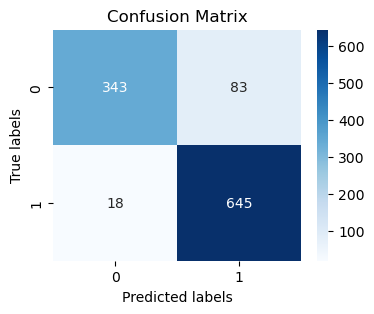

In [34]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth = 10, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Random Forest 학습 데이터에 대한 예측
rf_train_pred = rf_clf.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)

print(f"Random Forest Accuracy: {rf_train_accuracy*100:.2f}%")
print(f"Random Forest Test Accuracy: {rf_accuracy*100:.2f}%")

# 교차 검증
cv_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
#print(f"Cross Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()*100:.2f}%") 
print(f"Standard Deviation of CV Accuracy: {cv_scores.std()*100:.2f}%") 

# 예측
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

# 오차 행렬
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 오차 행렬 시각화
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [31]:
# Random Forest의 하이퍼 파라미터 예측

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy with best parameters: {accuracy*100:.2f}%")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.91
Accuracy with best parameters: 90.17%


In [15]:
import sklearn
sklearn.__version__

'1.2.2'

KNN train Accuracy: 88.63%
KNN test Accuracy: 83.93%
Mean CV Accuracy: 84.60%
Standard Deviation of CV Accuracy: 0.83%
Confusion Matrix:
[[291 135]
 [ 40 623]]


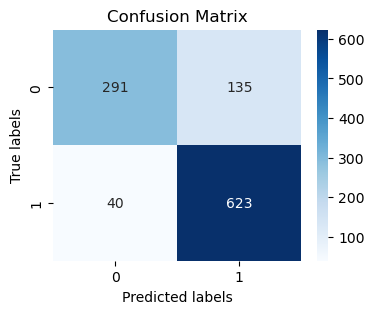

In [37]:
# KNN 알고리즘
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

knn_train_pred = knn_clf.predict(X_train)
knn_train_accuracy = accuracy_score(y_train, knn_train_pred)

print(f"KNN train Accuracy: {knn_train_accuracy*100:.2f}%")
print(f"KNN test Accuracy: {knn_accuracy*100:.2f}%")

# 교차 검증
cv_scores = cross_val_score(knn_clf, X, y, cv=5, scoring='accuracy')
#print(f"Cross Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()*100:.2f}%") 
print(f"Standard Deviation of CV Accuracy: {cv_scores.std()*100:.2f}%")

# 예측
y_train_pred = knn_clf.predict(X_train)
y_test_pred = knn_clf.predict(X_test)

# 오차 행렬
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 오차 행렬 시각화
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [38]:
#KNN 알고리즘의 하이퍼 파라미터 선택

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],  # 예시로 3부터 15까지의 홀수를 사용
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# KNN 분류기 객체 생성
knn = KNeighborsClassifier()

# 그리드 탐색 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)

# 그리드 탐색 실행
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# 최적의 파라미터를 사용한 KNN 모델
best_knn = grid_search.best_estimator_

# 최적의 파라미터를 사용하여 테스트 데이터에 대한 예측 수행
y_pred = grid_search.best_estimator_.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with best parameters: {accuracy*100:.2f}%")


Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score: 0.85
Test set accuracy with best parameters: 84.39%


In [17]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/11/6f/419545a6a344cfd1358a80c36a06431881d607830483ef63d7c38905cd22/xgboost-2.0.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.7 MB 991.0 kB/s eta 0:01:41
   ---------------------------------------- 0.5/99.7 MB 4.9 MB/s eta 0:00:21
   ---------------------------------------- 1.2/99.7 MB 7.5 MB/s eta 0:00:14
    --------------------------------------- 2.2/99.7 MB 10.7 MB/s eta 0:00:10
   - -------------------------------------- 3.2/99.7 MB 12.9 MB/s eta 0:00:08
   - -------------------------------------- 4.6/99.7 MB 15.5 MB/s eta 0:00:07
   -- ------------------------------------- 6.2/99.7 MB 18.0 MB/s eta 0:00:06
   -- ------------------------------------- 7.4/99.7 MB 18.9 MB/s eta 0:00:05
   --- -------------------------

Training Accuracy: 97.40%
Test Accuracy: 91.09%
Mean CV Accuracy: 91.05%
Standard Deviation of CV Accuracy: 0.54%
Confusion Matrix:
[[352  74]
 [ 23 640]]


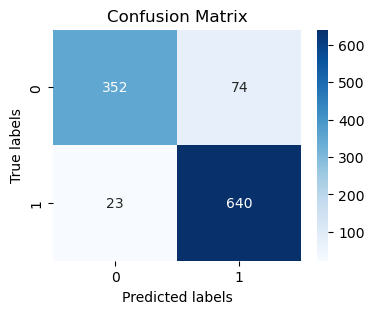

In [54]:
# XGboost

import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# XGBoost 분류기 생성
clf = xgb.XGBClassifier(
    objective='multi:softmax',  # 다중 클래스 분류
    num_class=3,  # 클래스의 수
    n_estimators=100,  # 트리의 개수
    max_depth=6,  # 트리의 최대 깊이
    learning_rate=0.1,  # 학습률
    subsample=0.8,  # 데이터 서브샘플링 비율
    colsample_bytree=0.8,  # 특성 서브샘플링 비율
    reg_alpha=0.1,  # L1 정규화
    reg_lambda=1,  # L2 정규화
    random_state=42
)

# 모델 학습
clf.fit(
    X_train, y_train,
    early_stopping_rounds=10,  # 10번의 반복 동안 성능 개선이 없으면 조기 종료
    eval_metric='mlogloss',  # 다중 클래스 로그 손실을 평가 지표로 사용
    eval_set=[(X_test, y_test)],  # 검증 데이터
    verbose=False  # 학습 과정 미출력
)

# 예측
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# 정확도 계산
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy*100:.2f}%") # 92.33%
print(f"Test Accuracy: {test_accuracy*100:.2f}%") # 76.72%

# 교차 검증
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
#print(f"Cross Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()*100:.2f}%") # 78.12%
print(f"Standard Deviation of CV Accuracy: {cv_scores.std()*100:.2f}%") # 1.02%

# 오차 행렬
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 오차 행렬 시각화
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Logistic Regression train Accuracy: 92.25%
Accuracy: 91.00%
Mean CV Accuracy: 91.38%
Standard Deviation of CV Accuracy: 0.71%
Confusion Matrix:
[[355  71]
 [ 27 636]]


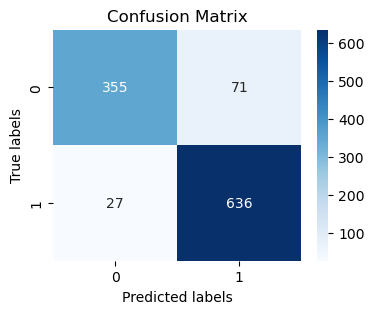

In [42]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 로지스틱 회귀 모델 생성 및 훈련
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# 로지스틱 회귀 학습 데이터에 대한 예측
lr_train_pred = lr.predict(X_train)
lr_train_accuracy = accuracy_score(y_train, lr_train_pred)
print(f"Logistic Regression train Accuracy: {lr_train_accuracy*100:.2f}%")
print(f"Accuracy: {accuracy*100:.2f}%")

# 교차 검증
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
#print(f"Cross Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()*100:.2f}%") 
print(f"Standard Deviation of CV Accuracy: {cv_scores.std()*100:.2f}%")

# 예측
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# 오차 행렬
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 오차 행렬 시각화
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [43]:
# 로지스틱 회귀 최적 파라미터 계산

# 파라미터 그리드 생성
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# 로지스틱 회귀 모델
lr = LogisticRegression(max_iter=1000)

# 그리드 검색 생성 및 학습
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 파라미터 및 성능 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

# 테스트 세트에서의 성능
best_lr = grid_search.best_estimator_
test_score = best_lr.score(X_test, y_test)
print("Test set Accuracy:", test_score)

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-validation Score: 0.9142095818572777
Test set Accuracy: 0.9090909090909091


정밀도 (Precision): 양성(Positive)으로 예측된 대상 중에서 실제로 양성인 것의 비율
재현율 (Recall): 실제 양성인 대상 중에서 양성으로 예측된 것의 비율
F1-점수 (F1-Score): 정밀도와 재현율의 조화 평균
지지도 (Support): 각 클래스에 속하는 실제 인스턴스의 수

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       426
           1       0.89      0.97      0.93       663

    accuracy                           0.91      1089
   macro avg       0.92      0.89      0.90      1089
weighted avg       0.91      0.91      0.91      1089

SVM Train Accuracy: 0.922077922077922
SVM Test Accuracy: 0.9090909090909091
Mean CV Accuracy: 91.34%
Standard Deviation of CV Accuracy: 0.91%
Confusion Matrix:
[[350  76]
 [ 23 640]]


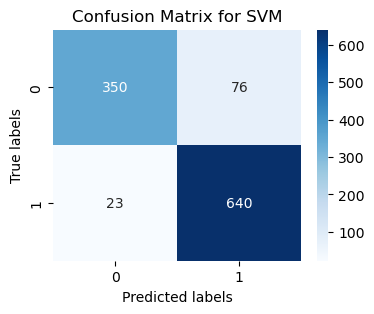

In [46]:
# SVM

from sklearn.svm import SVC

# SVM 모델 생성 및 훈련
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

# 테스트 데이터 예측
svm_predictions = svm_clf.predict(X_test)

# 성능 평가
print(classification_report(y_test, svm_predictions))
print("SVM Test Accuracy:", accuracy_score(y_test, svm_predictions))

# SVM 학습 데이터에 대한 예측
svm_train_predictions = svm_clf.predict(X_train)
print("SVM Train Accuracy:", accuracy_score(y_train, svm_train_predictions))

# 교차 검증
cv_scores = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Mean CV Accuracy: {cv_scores.mean()*100:.2f}%") 
print(f"Standard Deviation of CV Accuracy: {cv_scores.std()*100:.2f}%") 

# 오차 행렬
conf_matrix = confusion_matrix(y_test, svm_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# 오차 행렬 시각화
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVM')
plt.show()

In [ ]:
# SVM의 최적 파라미터 계산

# 파라미터 그리드 설정
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [1, 0.1, 0.01, 0.001]
}

# GridSearchCV를 사용하여 최적의 파라미터 탐색
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 파라미터로 SVC 훈련
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

# 예측 및 성능 평가
train_predictions = best_svm.predict(X_train)
test_predictions = best_svm.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, train_predictions))
print("Test Accuracy:", accuracy_score(y_test, test_predictions))

In [62]:
# GBM 알고리즘

from sklearn.ensemble import GradientBoostingClassifier

# GBM 모델 초기화
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 모델 훈련
gbm.fit(X_train, y_train)

# 예측
y_pred = gbm.predict(X_test)

# 학습 데이터에 대한 예측
gbm_train_pred = gbm.predict(X_train)
gbm_train_accuracy = accuracy_score(y_train, gbm_train_pred)
print(f"Gbm Train Accuracy: {ada_train_accuracy*100:.2f}%")

# 정확도 출력
print(f"Gbm Test Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")


Gbm Train Accuracy: 91.26%
Gbm Test Accuracy: 90.36%


In [61]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost 모델 초기화
# 기본적으로 AdaBoostClassifier는 DecisionTreeClassifier(max_depth=1)를 기반 학습기로 사용합니다.
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

# 모델 훈련
ada.fit(X_train, y_train)

# 예측
y_pred = ada.predict(X_test)

# 학습 데이터에 대한 예측
ada_train_pred = ada.predict(X_train)
ada_train_accuracy = accuracy_score(y_train, ada_train_pred)

print(f"AdaBoost Train Accuracy: {ada_train_accuracy*100:.2f}%")

# 정확도 출력
print(f"AdaBoost Test Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

AdaBoost Train Accuracy: 91.26%
AdaBoost Test Accuracy: 89.62%


In [ ]:
# 중요 파라미터가 확인 - RandomForest

import matplotlib.pyplot as plt

X = data.drop('Target', axis=1)  
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 특성 중요도를 가져옴
feature_importances = clf.feature_importances_

# 중요도에 따라 특성들을 정렬
sorted_idx = feature_importances.argsort()

# 특성 중요도를 시각화
plt.figure(figsize=(10, len(X.columns)))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()